In [2]:
#import Regression_variables from same directory
from Regression_variables import *
# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "data"

# compounds is the name of the data frame

/home/alex/miniforge3/envs/my-rdkit-env-covid/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-01 12:16:32.194958: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-01 12:16:32.219563: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



Assign cluster ID


  0%|          | 0/595 [00:00<?, ?it/s][12:16:38] DEPRECATION WARNING: please use MorganGenerator
[12:16:38] DEPRECATION WARNING: please use MorganGenerator
[12:16:38] DEPRECATION WARNING: please use MorganGenerator
[12:16:38] DEPRECATION WARNING: please use MorganGenerator
[12:16:38] DEPRECATION WARNING: please use MorganGenerator
[12:16:38] DEPRECATION WARNING: please use MorganGenerator
[12:16:38] DEPRECATION WARNING: please use MorganGenerator
[12:16:38] DEPRECATION WARNING: please use MorganGenerator
[12:16:38] DEPRECATION WARNING: please use MorganGenerator
[12:16:38] DEPRECATION WARNING: please use MorganGenerator
[12:16:38] DEPRECATION WARNING: please use MorganGenerator
[12:16:38] DEPRECATION WARNING: please use MorganGenerator
[12:16:38] DEPRECATION WARNING: please use MorganGenerator
[12:16:38] DEPRECATION WARNING: please use MorganGenerator
[12:16:38] DEPRECATION WARNING: please use MorganGenerator
[12:16:38] DEPRECATION WARNING: please use MorganGenerator
[12:16:38] DEPREC

In [3]:
compounds.head()

,Unnamed: 0,SMILES,CID,f_avg_IC50,r_avg_IC50,ROMol,molecular_weight,n_hba,n_hbd,logp,Ro5_fulfilled,f_avg_pIC50,r_avg_pIC50,Fingerprints,morgan2,pIC50_range
0,35,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,DAR-DIA-23aa0b97-19,26.719515,14.641091,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac34c0>,287.105862,3,1,3.28768,True,4.573171,4.834427,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","(4.203, 4.703]"
1,36,O=C(Cc1cncc2ccccc12)Nc1ccccc1,DAR-DIA-23aa0b97-20,57.590417,45.077469,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac3530>,262.110613,2,1,3.41600,True,4.239650,4.346040,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","(4.203, 4.703]"
2,126,Cc1c(N)cncc1NC(=O)Cc1cccc(Cl)c1,TRY-UNI-714a760b-3,4.222340,8.201698,<rdkit.Chem.rdchem.Mol object at 0x7fc31a435d20>,275.082540,3,2,2.80682,True,5.374447,5.086096,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","(5.203, 5.703]"
3,129,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,TRY-UNI-714a760b-6,24.581194,13.895165,<rdkit.Chem.rdchem.Mol object at 0x7fc31a435e70>,260.071641,2,1,3.22462,True,4.609397,4.857136,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","(4.203, 4.703]"
4,135,Cc1ccncc1NC(=O)Nc1cccc(Cl)c1,TRY-UNI-714a760b-12,64.508813,45.689263,<rdkit.Chem.rdchem.Mol object at 0x7fc31a436110>,261.066890,2,2,3.68742,True,4.190381,4.340186,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","(3.702, 4.203]"


# Testing for overfitting

In [ ]:
rfr_rand_best = RandomForestRegressor(random_state=SEED, n_estimators=514, max_depth=43, min_samples_split=3, min_samples_leaf=1)
rfr_rand_best.fit(np.array(list((x_train_rand))).astype(float), y_train_rand)
y_pred_rfr_rand_best = rfr_rand_best.predict(np.array(list((x_test_rand))).astype(float))
mae_rfr_rand_best = mean_absolute_error(y_test_rand, y_pred_rfr_rand_best)
mse_rfr_rand_best = mean_squared_error(y_test_rand, y_pred_rfr_rand_best)
r2_rfr_rand_best = r2_score(y_test_rand, y_pred_rfr_rand_best)

# Train the RandomForestRegressor
rfr_rand_best = RandomForestRegressor(random_state=SEED, n_estimators=514, max_depth=43, min_samples_split=3, min_samples_leaf=1)
rfr_rand_best.fit(np.array(list((x_train_rand))).astype(float), y_train_rand)

# Predict on the training set
y_train_pred = rfr_rand_best.predict(np.array(list((x_train_rand))).astype(float))

# Predict on the test set
y_test_pred = rfr_rand_best.predict(np.array(list((x_test_rand))).astype(float))

# Calculate metrics for the training set
mae_train = mean_absolute_error(y_train_rand, y_train_pred)
mse_train = mean_squared_error(y_train_rand, y_train_pred)
r2_train = r2_score(y_train_rand, y_train_pred)

# Calculate metrics for the test set
mae_test = mean_absolute_error(y_test_rand, y_test_pred)
mse_test = mean_squared_error(y_test_rand, y_test_pred)
r2_test = r2_score(y_test_rand, y_test_pred)

# Print metrics
print(f"Training Set Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"R2: {r2_train}")

print(f"\nTest Set Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"R2: {r2_test}")

# Check for overfitting
if r2_train > r2_test:
    print("\nThe model may be overfitting.")
else:
    print("\nThe model does not appear to be overfitting.")

Training Set Metrics:
MAE: 0.21306845665478258
MSE: 0.11595146640918798
R2: 0.8645971611621641

Test Set Metrics:
MAE: 0.37375197790517933
MSE: 0.298895313805794
R2: 0.5938937040355208

The model may be overfitting.


### Plot MAE vs Tree depth

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error

# Define the range of tree depths to test
tree_depths = range(1, 32)

# Initialize lists to store MAE values
mae_train_list = []
mae_test_list = []

# Iterate over the range of tree depths
for depth in tree_depths:
    # Initialize the RandomForestRegressor with the current depth
    model = RandomForestRegressor(random_state=SEED, n_estimators=514, max_depth=depth, min_samples_split=3, min_samples_leaf=1)
    
    # Fit the model
    model.fit(np.array(list((x_train_strat))).astype(float), y_train_strat)
    
    # Predict on the training set
    y_train_pred = model.predict(np.array(list((x_train_strat))).astype(float))
    
    # Predict on the test set
    y_test_pred = model.predict(np.array(list((x_test_strat))).astype(float))
    
    # Calculate MAE for the training set
    mae_train = mean_absolute_error(y_train_strat, y_train_pred)
    mae_train_list.append(mae_train)
    
    # Calculate MAE for the test set
    mae_test = mean_absolute_error(y_test_strat, y_test_pred)
    mae_test_list.append(mae_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(tree_depths, mae_train_list, label='Training MAE', marker='o')
plt.plot(tree_depths, mae_test_list, label='Test MAE', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

### Plot Loss vs Epochs (Train vs Test)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 10.8710 - val_loss: 1.5807
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1210 - val_loss: 1.1149
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9629 - val_loss: 0.8409
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6934 - val_loss: 0.6728
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4992 - val_loss: 0.5938
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4133 - val_loss: 0.5601
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3775 - val_loss: 0.5420
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3177 - val_loss: 0.5252
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2491 - val_loss: 0.5195
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2405 - val_loss: 0.5194
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2372 - val_loss: 0.5222
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 

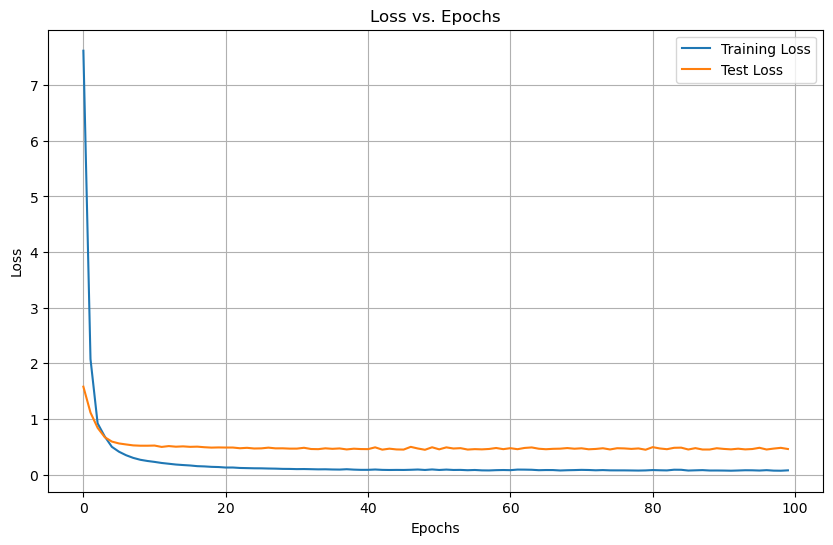

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Assuming x and y are your features and target variables
# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(np.array(list((x_train_strat))).astype(float))
x_test = scaler.transform(np.array(list((x_test_strat))).astype(float))
y_train = y_train_strat
y_test = y_test_strat

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model and record the history
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32, verbose=1)

# Plot the training and test loss against the number of epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
rfr_rand = RandomForestRegressor(random_state=SEED)
rfr_strat = RandomForestRegressor(random_state=SEED)
rfr_hi = RandomForestRegressor(random_state=SEED)
rfr_noise = RandomForestRegressor(random_state=SEED)
rfr_fur = RandomForestRegressor(random_state=SEED)
rfr_rand.fit(np.array(list((x_train_rand))).astype(float), y_train_rand)
rfr_strat.fit(np.array(list((x_train_strat))).astype(float), y_train_strat)
rfr_hi.fit(np.array(list((x_train_hi))).astype(float), y_train_hi)
rfr_noise.fit(np.array(list((x_train_noise))).astype(float), y_train_noise)
rfr_fur.fit(np.array(list((x_train_fur))).astype(float), y_train_fur)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rfr_rand = rfr_rand.predict(np.array(list((x_test_rand))).astype(float))
y_pred_rfr_strat = rfr_strat.predict(np.array(list((x_test_strat))).astype(float))
y_pred_rfr_hi = rfr_hi.predict(np.array(list((x_test_hi))).astype(float))
y_pred_rfr_noise = rfr_noise.predict(np.array(list((x_test_noise))).astype(float))
y_pred_rfr_fur = rfr_fur.predict(np.array(list((x_test_fur))).astype(float))

In [ ]:
mae_rfr_rand = mean_absolute_error(y_test_rand, y_pred_rfr_rand)
mse_rfr_rand = mean_squared_error(y_test_rand, y_pred_rfr_rand)
r2_rfr_rand = r2_score(y_test_rand, y_pred_rfr_rand)

mae_rfr_strat = mean_absolute_error(y_test_strat, y_pred_rfr_strat)
mse_rfr_strat = mean_squared_error(y_test_strat, y_pred_rfr_strat)
r2_rfr_strat = r2_score(y_test_strat, y_pred_rfr_strat)

mae_rfr_hi = mean_absolute_error(y_test_hi, y_pred_rfr_hi)
mse_rfr_hi = mean_squared_error(y_test_hi, y_pred_rfr_hi)
r2_rfr_hi = r2_score(y_test_hi, y_pred_rfr_hi)

mae_rfr_noise = mean_absolute_error(y_test_noise, y_pred_rfr_noise)
mse_rfr_noise = mean_squared_error(y_test_noise, y_pred_rfr_noise)
r2_rfr_noise = r2_score(y_test_noise, y_pred_rfr_noise)

mae_rfr_fur = mean_absolute_error(y_test_fur, y_pred_rfr_fur)
mse_rfr_fur = mean_squared_error(y_test_fur, y_pred_rfr_fur)
r2_rfr_fur = r2_score(y_test_fur, y_pred_rfr_fur)

In [ ]:
#Creat a table that shows the performance of the random forest regressor on the different splits displaying mae, mse and r2 values
split_scores_rfr_initial = {'Split': ['Random', 'Stratified pIC50', 'Hierarchical Clustering', 'UMAP Noise', 'UMAP Furthest Cluster'],
        'MAE': [mae_rfr_rand, mae_rfr_strat, mae_rfr_hi, mae_rfr_noise, mae_rfr_fur],
        'MSE': [mse_rfr_rand, mse_rfr_strat, mse_rfr_hi, mse_rfr_noise, mse_rfr_fur],
        'R2': [r2_rfr_rand, r2_rfr_strat, r2_rfr_hi, r2_rfr_noise, r2_rfr_fur]}

split_scores_rfr_initial_df = pd.DataFrame(split_scores_rfr_initial)
split_scores_rfr_initial_df.set_index("Split", inplace=True)
#save df to csv in data file
split_scores_rfr_initial_df.to_csv(DATA / "split_scores_rfr_initial.csv")

print(split_scores_rfr_initial_df)

                              MAE       MSE        R2
Split                                                
Random                   0.382970  0.309122  0.579999
Stratified pIC50         0.461976  0.423172  0.516725
Hierarchical Clustering  0.674829  0.705286  0.323519
UMAP Noise               0.779775  0.853147 -0.113559
UMAP Furthest Cluster    0.839491  0.938845 -0.237629


# Optuna

In [ ]:
def objective(trial, X_train, y_train):
    n_estimators = trial.suggest_int("n_estimators", 50, 750)
    max_depth = trial.suggest_int("max_depth", 4, 8)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1).mean()
    return score

In [ ]:
study_rand = optuna.create_study(direction="maximize", sampler=optuna.samplers.RandomSampler(seed=SEED))
# study_strat = optuna.create_study(direction="maximize", sampler=optuna.samplers.RandomSampler(seed=SEED))
# study_hi = optuna.create_study(direction="maximize", sampler=optuna.samplers.RandomSampler(seed=SEED))
# study_noise = optuna.create_study(direction="maximize", sampler=optuna.samplers.RandomSampler(seed=SEED))
# study_fur = optuna.create_study(direction="maximize", sampler=optuna.samplers.RandomSampler(seed=SEED))

#set the sampler of this study to genetic aglorithm
study_rand_TPE = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=SEED))


[I 2024-07-31 15:42:49,513] A new study created in memory with name: no-name-87cdd6b9-9af7-4039-b561-10bf5f68ef25
[I 2024-07-31 15:42:49,518] A new study created in memory with name: no-name-e52a7e54-e4f8-470a-8492-d61ad8794617


In [ ]:
#add trials using study.optimize
study_rand.optimize(lambda trial: objective(trial, np.array(list((x_train_rand))).astype(float), y_train_rand), n_trials=1000, show_progress_bar=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2024-07-31 15:06:46,294] Trial 0 finished with value: -0.48626891414476126 and parameters: {'n_estimators': 312, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 6}. Best is trial 0 with value: -0.48626891414476126.
[I 2024-07-31 15:06:49,110] Trial 1 finished with value: -0.5759569350990107 and parameters: {'n_estimators': 159, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 9}. Best is trial 0 with value: -0.48626891414476126.
[I 2024-07-31 15:06:52,138] Trial 2 finished with value: -0.5314280961795156 and parameters: {'n_estimators': 471, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 0 with value: -0.48626891414476126.
[I 2024-07-31 15:06:58,089] Trial 3 finished with value: -0.5003204811913246 and parameters: {'n_estimators': 633, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 0 with value: -0.48626891414476126.
[I 2024-07-31 15:07:02,040] Trial 4 finished with value: -0.4762254421780171 and p

KeyboardInterrupt: 

In [ ]:
#add trials using study.optimize
study_rand_TPE.optimize(lambda trial: objective(trial, np.array(list((x_train_rand))).astype(float), y_train_rand), n_trials=1000, show_progress_bar=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2024-07-31 15:43:06,423] Trial 0 finished with value: -0.4902843037036127 and parameters: {'n_estimators': 312, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 6}. Best is trial 0 with value: -0.4902843037036127.
[I 2024-07-31 15:43:09,035] Trial 1 finished with value: -0.5811921855780133 and parameters: {'n_estimators': 159, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 9}. Best is trial 0 with value: -0.4902843037036127.
[I 2024-07-31 15:43:10,739] Trial 2 finished with value: -0.5308216158376542 and parameters: {'n_estimators': 471, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 0 with value: -0.4902843037036127.
[I 2024-07-31 15:43:13,143] Trial 3 finished with value: -0.49788812262410803 and parameters: {'n_estimators': 633, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 0 with value: -0.4902843037036127.
[I 2024-07-31 15:43:14,189] Trial 4 finished with value: -0.4767518472070579 and param

In [ ]:
# # Call the optimize function
# study_rand_TPE.optimize(lambda trial: objective(trial, np.array(list((x_train_rand))).astype(float), y_train_rand), n_trials=500, show_progress_bar=True)

# # study_rand_gene.optimize(lambda trial: objective_gene(trial, np.array(list((x_train_rand))).astype(float), y_train_rand, np.array(list((x_test_rand))).astype(float), y_test_rand), n_trials=1000, show_progress_bar=True)

In [ ]:

# study_strat.optimize(lambda trial: objective(trial, np.array(list((x_train_strat))).astype(float), y_train_strat), n_trials=200, show_progress_bar=True)


In [ ]:
# study_hi.optimize(lambda trial: objective(trial, np.array(list((x_train_hi))).astype(float), y_train_hi), n_trials=200, show_progress_bar=True)


In [ ]:
# study_noise.optimize(lambda trial: objective(trial, np.array(list((x_train_noise))).astype(float), y_train_noise), n_trials=200, show_progress_bar=True)


In [ ]:
# study_fur.optimize(lambda trial: objective(trial, np.array(list((x_train_fur))).astype(float), y_train_fur), n_trials=200, show_progress_bar=True)

In [ ]:
best_params_rand = study_rand.best_params
# best_params_strat = study_strat.best_params
# best_params_hi = study_hi.best_params
# best_params_noise = study_noise.best_params
# best_params_fur = study_fur.best_params


In [ ]:
best_params_rand_TPE = study_rand_TPE.best_params

In [ ]:
# best_n_estimators_rand = best_params_rand["n_estimators"]
# best_max_depth_rand = best_params_rand["max_depth"]
# best_min_samples_split_rand = best_params_rand["min_samples_split"]
# best_min_samples_leaf_rand = best_params_rand["min_samples_leaf"]

best_n_estimators_rand_TPE = best_params_rand_TPE["n_estimators"]
best_max_depth_rand_TPE = best_params_rand_TPE["max_depth"]
best_min_samples_split_rand_TPE = best_params_rand_TPE["min_samples_split"]
best_min_samples_leaf_rand_TPE = best_params_rand_TPE["min_samples_leaf"]


# best_n_estimators_strat = best_params_strat["n_estimators"]
# best_max_depth_strat = best_params_strat["max_depth"]
# best_min_samples_split_strat = best_params_strat["min_samples_split"]
# best_min_samples_leaf_strat = best_params_strat["min_samples_leaf"]

# best_n_estimators_hi = best_params_hi["n_estimators"]
# best_max_depth_hi = best_params_hi["max_depth"]
# best_min_samples_split_hi = best_params_hi["min_samples_split"]
# best_min_samples_leaf_hi = best_params_hi["min_samples_leaf"]

# best_n_estimators_noise = best_params_noise["n_estimators"]
# best_max_depth_noise = best_params_noise["max_depth"]
# best_min_samples_split_noise = best_params_noise["min_samples_split"]
# best_min_samples_leaf_noise = best_params_noise["min_samples_leaf"]

# best_n_estimators_fur = best_params_fur["n_estimators"]
# best_max_depth_fur = best_params_fur["max_depth"]
# best_min_samples_split_fur = best_params_fur["min_samples_split"]
# best_min_samples_leaf_fur = best_params_fur["min_samples_leaf"]

In [ ]:
rfr_rand_best_TPE = RandomForestRegressor(random_state=SEED, n_estimators=best_n_estimators_rand_TPE, max_depth=best_max_depth_rand_TPE, min_samples_split=best_min_samples_split_rand_TPE, min_samples_leaf=best_min_samples_leaf_rand_TPE)
rfr_rand_best_TPE.fit(np.array(list((x_train_rand))).astype(float), y_train_rand)
y_pred_rfr_rand_best_TPE = rfr_rand_best_TPE.predict(np.array(list((x_test_rand))).astype(float))

mae_rfr_rand_best_TPE = mean_absolute_error(y_test_rand, y_pred_rfr_rand_best_TPE)
mse_rfr_rand_best_TPE = mean_squared_error(y_test_rand, y_pred_rfr_rand_best_TPE)
r2_rfr_rand_best_TPE = r2_score(y_test_rand, y_pred_rfr_rand_best_TPE)


0.42418607453082047
0.32637850467878576
0.5565525470110004


In [ ]:

rfr_rand_best = RandomForestRegressor(random_state=SEED, n_estimators=best_n_estimators_rand, max_depth=best_max_depth_rand, min_samples_split=best_min_samples_split_rand, min_samples_leaf=best_min_samples_leaf_rand)
# rfr_strat_best = RandomForestRegressor(random_state=SEED, n_estimators=best_n_estimators_strat, max_depth=best_max_depth_strat, min_samples_split=best_min_samples_split_strat, min_samples_leaf=best_min_samples_leaf_strat)
# rfr_hi_best = RandomForestRegressor(random_state=SEED, n_estimators=best_n_estimators_hi, max_depth=best_max_depth_hi, min_samples_split=best_min_samples_split_hi, min_samples_leaf=best_min_samples_leaf_hi)
# rfr_noise_best = RandomForestRegressor(random_state=SEED, n_estimators=best_n_estimators_noise, max_depth=best_max_depth_noise, min_samples_split=best_min_samples_split_noise, min_samples_leaf=best_min_samples_leaf_noise)
# rfr_fur_best = RandomForestRegressor(random_state=SEED, n_estimators=best_n_estimators_fur, max_depth=best_max_depth_fur, min_samples_split=best_min_samples_split_fur, min_samples_leaf=best_min_samples_leaf_fur)

rfr_rand_best.fit(np.array(list((x_train_rand))).astype(float), y_train_rand)
# rfr_strat_best.fit(np.array(list((x_train_strat))).astype(float), y_train_strat)
# rfr_hi_best.fit(np.array(list((x_train_hi))).astype(float), y_train_hi)
# rfr_noise_best.fit(np.array(list((x_train_noise))).astype(float), y_train_noise)
# rfr_fur_best.fit(np.array(list((x_train_fur))).astype(float), y_train_fur)

y_pred_rfr_rand_best = rfr_rand_best.predict(np.array(list((x_test_rand))).astype(float))
# y_pred_rfr_strat_best = rfr_strat_best.predict(np.array(list((x_test_strat))).astype(float))
# y_pred_rfr_hi_best = rfr_hi_best.predict(np.array(list((x_test_hi))).astype(float))
# y_pred_rfr_noise_best = rfr_noise_best.predict(np.array(list((x_test_noise))).astype(float))
# y_pred_rfr_fur_best = rfr_fur_best.predict(np.array(list((x_test_fur))).astype(float))

In [ ]:
                                          
# mae_rfr_rand_best = mean_absolute_error(y_test_rand, y_pred_rfr_rand_best)
# # mae_rfr_strat_best = mean_absolute_error(y_test_strat, y_pred_rfr_strat_best)
# # mae_rfr_hi_best = mean_absolute_error(y_test_hi, y_pred_rfr_hi_best)
# # mae_rfr_noise_best = mean_absolute_error(y_test_noise, y_pred_rfr_noise_best)
# # mae_rfr_fur_best = mean_absolute_error(y_test_fur, y_pred_rfr_fur_best)

# mse_rfr_rand_best = mean_squared_error(y_test_rand, y_pred_rfr_rand_best)
# # mse_rfr_strat_best = mean_squared_error(y_test_strat, y_pred_rfr_strat_best)
# # mse_rfr_hi_best = mean_squared_error(y_test_hi, y_pred_rfr_hi_best)
# # mse_rfr_noise_best = mean_squared_error(y_test_noise, y_pred_rfr_noise_best)
# # mse_rfr_fur_best = mean_squared_error(y_test_fur, y_pred_rfr_fur_best)

# r2_rfr_rand_best = r2_score(y_test_rand, y_pred_rfr_rand_best)
# # r2_rfr_strat_best = r2_score(y_test_strat, y_pred_rfr_strat_best)
# # r2_rfr_hi_best = r2_score(y_test_hi, y_pred_rfr_hi_best)
# # r2_rfr_noise_best = r2_score(y_test_noise, y_pred_rfr_noise_best)
# # r2_rfr_fur_best = r2_score(y_test_fur, y_pred_rfr_fur_best)

# # split_scores_rfr_best = {'Split': ['Random', 'Random Optimized', 'Stratified pIC50', 'Stratified pIC50 Optimized', 'Hierarchical Clustering', 'Hierarchical Clustering Optimized', 'UMAP Noise', 'UMAP Noise Optimized', 'UMAP Furthest Cluster', 'UMAP Furthest Cluster Optimized'],
# #         'MAE': [mae_rfr_rand, mae_rfr_rand_best, mae_rfr_strat, mae_rfr_strat_best, mae_rfr_hi, mae_rfr_hi_best, mae_rfr_noise, mae_rfr_noise_best, mae_rfr_fur, mae_rfr_fur_best],
# #         'MSE': [mse_rfr_rand, mse_rfr_rand_best, mse_rfr_strat, mse_rfr_strat_best, mse_rfr_hi, mse_rfr_hi_best, mse_rfr_noise, mse_rfr_noise_best, mse_rfr_fur, mse_rfr_fur_best],
# #         'R2': [r2_rfr_rand, r2_rfr_rand_best, r2_rfr_strat, r2_rfr_strat_best, r2_rfr_hi, r2_rfr_hi_best, r2_rfr_noise, r2_rfr_noise_best, r2_rfr_fur, r2_rfr_fur_best]}

# split_scores_rfr_best = {'Split': ['Random', 'Random Optimized: Random Sampler', 'Random Optimized: TPE', 'Stratified pIC50','Hierarchical Clustering', 'UMAP Noise', 'UMAP Furthest Cluster'],
#         'MAE': [mae_rfr_rand, mae_rfr_rand_best, mae_rfr_rand_best_TPE, mae_rfr_strat, mae_rfr_hi, mae_rfr_noise, mae_rfr_fur],
#         'MSE': [mse_rfr_rand, mse_rfr_rand_best,  mse_rfr_rand_best_TPE, mse_rfr_strat, mse_rfr_hi, mse_rfr_noise, mse_rfr_fur],
#         'R2': [r2_rfr_rand, r2_rfr_rand_best, r2_rfr_rand_best_TPE, r2_rfr_strat, r2_rfr_hi, r2_rfr_noise, r2_rfr_fur]}

# split_scores_rfr_best_df = pd.DataFrame(split_scores_rfr_best)
# print(split_scores_rfr_best_df)

                              Split       MAE       MSE        R2
0                            Random  0.382970  0.309122  0.579999
1  Random Optimized: Random Sampler  0.379481  0.301602  0.590216
2             Random Optimized: TPE  0.375239  0.301341  0.590571
3                  Stratified pIC50  0.461976  0.423172  0.516725
4           Hierarchical Clustering  0.674829  0.705286  0.323519
5                        UMAP Noise  0.783802  0.828038 -0.040280
6             UMAP Furthest Cluster  0.839491  0.938845 -0.237629


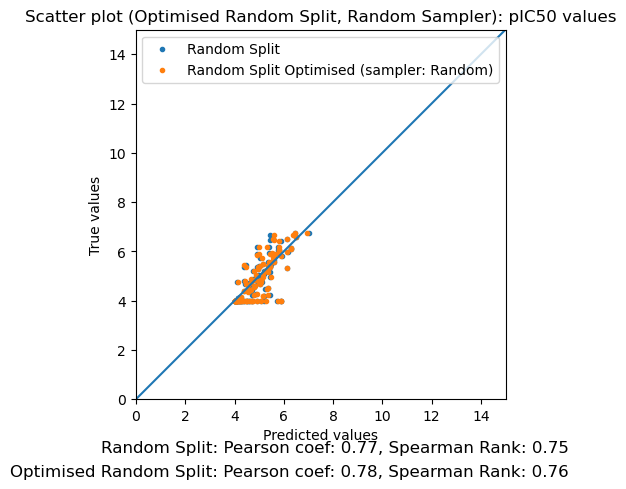

In [ ]:
# Scatter plot
limits = 0, 15
fig, ax = plt.subplots()
ax.scatter(y_pred_rfr_rand, y_test_rand, marker=".", label="Random Split")
ax.scatter(y_pred_rfr_rand_best, y_test_rand, marker=".", label="Random Split Optimised (sampler: Random)")
lin = np.linspace(*limits, 100)
ax.plot(lin, lin)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
ax.set_title("Scatter plot (Optimised Random Split, Random Sampler): pIC50 values")
ax.set_xlim(limits)
ax.set_ylim(limits)

pearsoncoef_rfr_rand = np.corrcoef(y_pred_rfr_rand.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand= spearmanr(y_pred_rfr_rand.flatten(), y_test_rand.values.flatten()).correlation
pearsoncoef_rfr_rand_best = np.corrcoef(y_pred_rfr_rand_best.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand_best = spearmanr(y_pred_rfr_rand_best.flatten(), y_test_rand.values.flatten()).correlation

fig.text(0.9, 0, f"Random Split: Pearson coef: {pearsoncoef_rfr_rand:.2f}, Spearman Rank: {spearmancoef_rfr_rand:.2f}", horizontalalignment='right', fontsize=12)
fig.text(0.9, -0.05, f"Optimised Random Split: Pearson coef: {pearsoncoef_rfr_rand_best:.2f}, Spearman Rank: {spearmancoef_rfr_rand_best:.2f}", horizontalalignment='right', fontsize=12)

ax.legend()
plt.show();

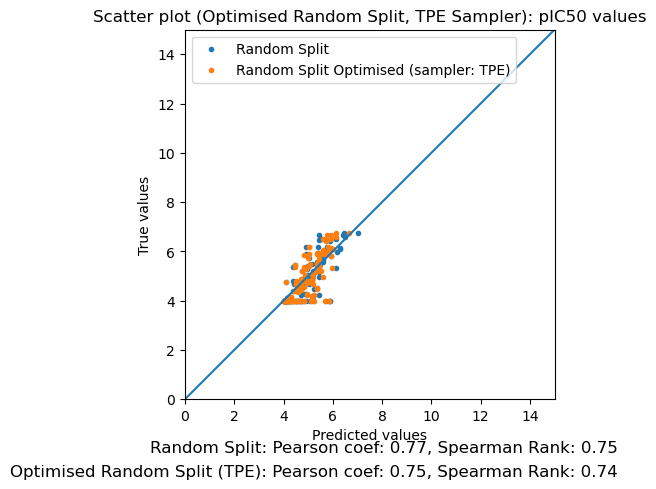

In [ ]:
# Scatter plot
limits = 0, 15
fig, ax = plt.subplots()
ax.scatter(y_pred_rfr_rand, y_test_rand, marker=".", label="Random Split")
ax.scatter(y_pred_rfr_rand_best_TPE, y_test_rand, marker=".", label="Random Split Optimised (sampler: TPE)")
lin = np.linspace(*limits, 100)
ax.plot(lin, lin)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
ax.set_title("Scatter plot (Optimised Random Split, TPE Sampler): pIC50 values")
ax.set_xlim(limits)
ax.set_ylim(limits)

pearsoncoef_rfr_rand_best_TPE= np.corrcoef(y_pred_rfr_rand_best_TPE.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand_best_TPE = spearmanr(y_pred_rfr_rand_best_TPE.flatten(), y_test_rand.values.flatten()).correlation
pearsoncoef_rfr_rand = np.corrcoef(y_pred_rfr_rand.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand = spearmanr(y_pred_rfr_rand.flatten(), y_test_rand.values.flatten()).correlation
fig.text(0.9, 0, f"Random Split: Pearson coef: {pearsoncoef_rfr_rand:.2f}, Spearman Rank: {spearmancoef_rfr_rand:.2f}", horizontalalignment='right', fontsize=12)
fig.text(0.9, -0.05, f"Optimised Random Split (TPE): Pearson coef: {pearsoncoef_rfr_rand_best_TPE:.2f}, Spearman Rank: {spearmancoef_rfr_rand_best_TPE:.2f}", horizontalalignment='right', fontsize=12)
ax.legend()
plt.show();

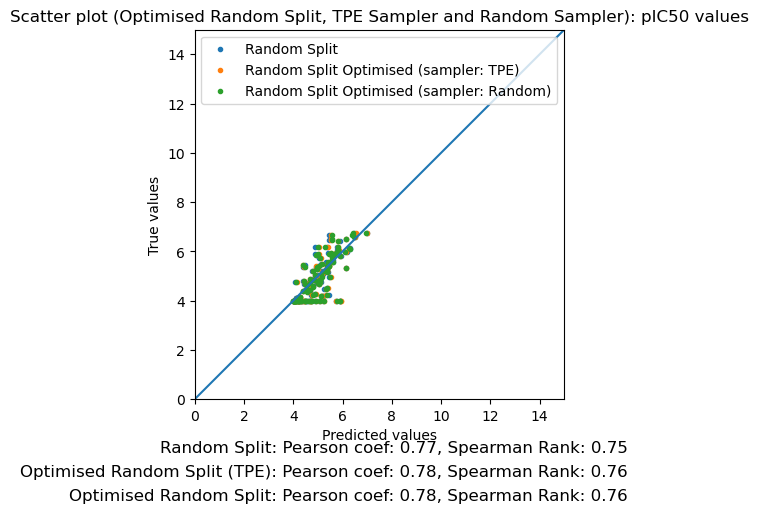

In [ ]:
# Scatter plot
limits = 0, 15
fig, ax = plt.subplots()
ax.scatter(y_pred_rfr_rand, y_test_rand, marker=".", label="Random Split")
ax.scatter(y_pred_rfr_rand_best_TPE, y_test_rand, marker=".", label="Random Split Optimised (sampler: TPE)")
ax.scatter(y_pred_rfr_rand_best, y_test_rand, marker=".", label="Random Split Optimised (sampler: Random)")
lin = np.linspace(*limits, 100)
ax.plot(lin, lin)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
ax.set_title("Scatter plot (Optimised Random Split, TPE Sampler and Random Sampler): pIC50 values")
ax.set_xlim(limits)
ax.set_ylim(limits)


pearsoncoef_rfr_rand_best_TPE= np.corrcoef(y_pred_rfr_rand_best_TPE.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand_best_TPE = spearmanr(y_pred_rfr_rand_best_TPE.flatten(), y_test_rand.values.flatten()).correlation
pearsoncoef_rfr_rand = np.corrcoef(y_pred_rfr_rand.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand = spearmanr(y_pred_rfr_rand.flatten(), y_test_rand.values.flatten()).correlation
pearsoncoef_rfr_rand_best = np.corrcoef(y_pred_rfr_rand_best.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand_best = spearmanr(y_pred_rfr_rand_best.flatten(), y_test_rand.values.flatten()).correlation

fig.text(0.9, 0, f"Random Split: Pearson coef: {pearsoncoef_rfr_rand:.2f}, Spearman Rank: {spearmancoef_rfr_rand:.2f}", horizontalalignment='right', fontsize=12)
fig.text(0.9, -0.05, f"Optimised Random Split (TPE): Pearson coef: {pearsoncoef_rfr_rand_best_TPE:.2f}, Spearman Rank: {spearmancoef_rfr_rand_best_TPE:.2f}", horizontalalignment='right', fontsize=12)
fig.text(0.9, -0.10, f"Optimised Random Split: Pearson coef: {pearsoncoef_rfr_rand_best:.2f}, Spearman Rank: {spearmancoef_rfr_rand_best:.2f}", horizontalalignment='right', fontsize=12)
ax.legend()
plt.show();

In [ ]:
optuna.visualization.plot_optimization_history(study_rand)

### Dark lines are parameters that work better

In [ ]:
optuna.visualization.plot_parallel_coordinate(study_rand)

In [ ]:
optuna.visualization.plot_slice(study_rand, params=["n_estimators", "max_depth", "min_samples_split", "min_samples_leaf"])

In [ ]:
optuna.visualization.plot_param_importances(study_rand)

In [ ]:
study_rand.best_params

{'n_estimators': 268,
 'max_depth': 31,
 'min_samples_split': 4,
 'min_samples_leaf': 1}

In [ ]:
study_rand_TPE.best_params

{'n_estimators': 323,
 'max_depth': 8,
 'min_samples_split': 2,
 'min_samples_leaf': 1}

In [ ]:
rfr_rand_best = RandomForestRegressor(random_state=SEED, n_estimators=514, max_depth=43, min_samples_split=3, min_samples_leaf=1)
history = rfr_rand_best.fit(np.array(list((x_train_rand))).astype(float), y_train_rand)
y_pred_rfr_rand_best = rfr_rand_best.predict(np.array(list((x_test_rand))).astype(float))
mae_rfr_rand_best = mean_absolute_error(y_test_rand, y_pred_rfr_rand_best)
mse_rfr_rand_best = mean_squared_error(y_test_rand, y_pred_rfr_rand_best)
r2_rfr_rand_best = r2_score(y_test_rand, y_pred_rfr_rand_best)

# Train the RandomForestRegressor
rfr_rand_best = RandomForestRegressor(random_state=SEED, n_estimators=514, max_depth=43, min_samples_split=3, min_samples_leaf=1)
rfr_rand_best.fit(np.array(list((x_train_rand))).astype(float), y_train_rand)

# Predict on the training set
y_train_pred = rfr_rand_best.predict(np.array(list((x_train_rand))).astype(float))

# Predict on the test set
y_test_pred = rfr_rand_best.predict(np.array(list((x_test_rand))).astype(float))

# Calculate metrics for the training set
mae_train = mean_absolute_error(y_train_rand, y_train_pred)
mse_train = mean_squared_error(y_train_rand, y_train_pred)
r2_train = r2_score(y_train_rand, y_train_pred)

# Calculate metrics for the test set
mae_test = mean_absolute_error(y_test_rand, y_test_pred)
mse_test = mean_squared_error(y_test_rand, y_test_pred)
r2_test = r2_score(y_test_rand, y_test_pred)

# Print metrics
print(f"Training Set Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"R2: {r2_train}")

print(f"\nTest Set Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"R2: {r2_test}")

# Check for overfitting
if r2_train > r2_test:
    print("\nThe model may be overfitting.")
else:
    print("\nThe model does not appear to be overfitting.")

Training Set Metrics:
MAE: 0.21306845665478258
MSE: 0.11595146640918798
R2: 0.8645971611621641

Test Set Metrics:
MAE: 0.37375197790517933
MSE: 0.298895313805794
R2: 0.5938937040355208

The model may be overfitting.
